## *Minst Dataset*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets. mnist import load_data
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras import optimizers

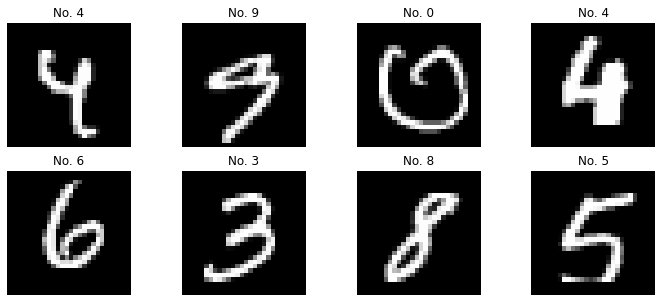

In [ ]:
(X_train,Y_train),(X_test, Y_test)=load_data()

#display 8 random image from traning dataset
np.random.seed(123)

rand_8=np.random.randint(0,X_train.shape[0],8)
sample_x=X_train[rand_8]
sample_y=Y_train[rand_8]

num_rows, num_cols=2,4
f, ax=plt.subplots(num_rows,num_cols, figsize=(12,5))

for i in range(num_rows):
  for j in range(num_cols):
    image_index=i*4+j
    ax[i,j].axis('off')
    ax[i,j].imshow(sample_x[image_index],cmap='gray')
    ax[i,j].set_title(f'No. {sample_y[image_index]}')
plt.show()
plt.close()

pre-processing

In [ ]:
#reshape

image_height=X_train.shape[1]
image_width=X_train.shape[2]
num_channels=1

training=np.reshape(X_train,(X_train.shape[0],image_height, image_width, num_channels))
testing=np.reshape(X_test,(X_test.shape[0],image_height, image_width, num_channels))

training=training.astype('float32')/255.
testing=testing.astype('float32')/255.

num_classes=10
train_labels_cate=to_categorical(Y_train, num_classes)
test_labels_cate=to_categorical(Y_test, num_classes)
train_labels_cate.shape, test_labels_cate.shape

#split training dataset into training and validation (10% of training)
for _ in range(5):
  indexes=np.random.permutation(len(training))

training=training[indexes]
train_labels_cate=train_labels_cate[indexes]

#set 10% of traning as validation
val_perc=0.1
val_count=int(val_perc*len(training))

validation=training[:val_count,:]
val_labels_cate=train_labels_cate[:val_count,:]

training2=training[val_count:,:]
train_label_cate2=train_labels_cate[val_count:,:]

In [ ]:
training.shape

(60000, 28, 28, 1)

In [ ]:
#construct MLP model from strach
dropout=0.45

model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=dropout))
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=dropout))
model.add(Dense(10,activation='softmax'))
# compile with adam optimizer & categorical_crossentropy loss function
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer=optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
epochs=30
batch_size=128

history=model.fit(training2, train_label_cate2, epochs=epochs, batch_size=batch_size,validation_data=(validation,val_labels_cate ))

Epoch 1/30
422/422 [==============================] - 1s 3ms/step - loss: 0.3422 - acc: 0.8951 - val_loss: 0.1410 - val_acc: 0.9568
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1522 - acc: 0.9536 - val_loss: 0.0944 - val_acc: 0.9697
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1209 - acc: 0.9635 - val_loss: 0.0957 - val_acc: 0.9678
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0984 - acc: 0.9697 - val_loss: 0.0700 - val_acc: 0.9780
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0844 - acc: 0.9733 - val_loss: 0.0720 - val_acc: 0.9777
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0802 - acc: 0.9756 - val_loss: 0.0600 - val_acc: 0.9813
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0678 - acc: 0.9782 - val_loss: 0.0599 - val_acc: 0.9822
Epoch 8/30
422/422 [==============================] - 1s 3ms/step - loss: 0.

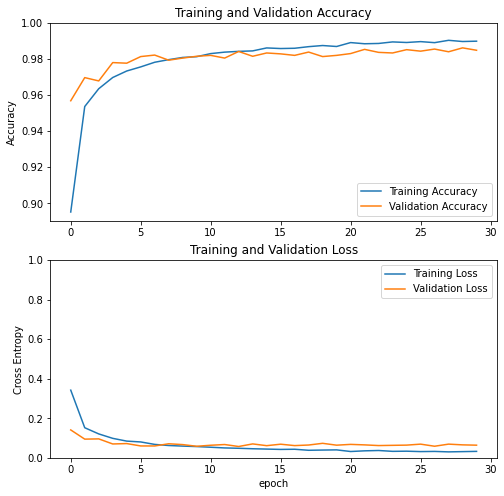

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Fine Tuning

In [ ]:
#fine-tune
model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 3

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable =  False

#add dropout layer, change learning rate to 2e-5
last=model.layers[-1].output
x=Dense(256, activation='relu')(last)
x = Dropout(0.2)(x)
x=Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x=Dense(num_classes, activation='softmax')(x)

# Compile the model and use a smaller learning rate for optimizer
model.compile(optimizer=optimizers.Adam(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

Number of layers in the base model:  6


In [ ]:
fine_tune_epochs=20
total_epochs=epochs+fine_tune_epochs

history_fine=model.fit(training2, 
                  train_label_cate2, 
                  epochs=total_epochs, 
                  initial_epoch=history.epoch[-1],
                  validation_data=(validation,val_labels_cate ))

Epoch 30/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0243 - acc: 0.9917 - val_loss: 0.0636 - val_acc: 0.9850
Epoch 31/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0244 - acc: 0.9922 - val_loss: 0.0633 - val_acc: 0.9848
Epoch 32/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0246 - acc: 0.9919 - val_loss: 0.0631 - val_acc: 0.9852
Epoch 33/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0222 - acc: 0.9924 - val_loss: 0.0623 - val_acc: 0.9857
Epoch 34/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0222 - acc: 0.9928 - val_loss: 0.0621 - val_acc: 0.9858
Epoch 35/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0203 - acc: 0.9930 - val_loss: 0.0622 - val_acc: 0.9860
Epoch 36/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0215 - acc: 0.9932 - val_loss: 0.0623 - val_acc: 0.9858
Epoch 37/50
1688/1688 [==============================] 

In [ ]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

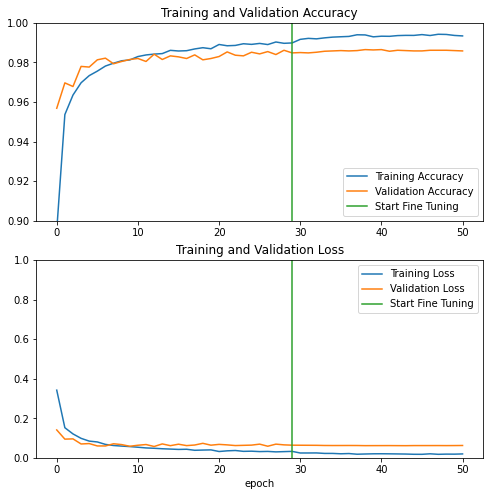

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1.0])
plt.plot([epochs-1,epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([epochs-1,epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#final mode evaluation on test dataset

test_loss, test_accuracy = \
  model.evaluate(testing, test_labels_cate, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

157/157 [==============================] - 0s 2ms/step - loss: 0.0607 - acc: 0.9863
Test loss: 0.0607 accuracy: 0.9863


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
y_pred=model.predict(testing,verbose=0)
y_pred=np.argmax(a=y_pred,axis=1)
y_true_classes=np.argmax(a=test_labels_cate,axis=1)
precision = precision_score(y_true_classes,y_pred,average='micro')
print('Precision: %.5f' % precision)